In [110]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime


In [111]:
df = pd.read_csv("./cook.csv", header=0)

In [112]:
# Processing 

def getDate(row):
    return datetime.datetime.strptime(row["Date of Incident"], "%m/%d/%y %H:%M")

#  Add date 
df['Date'] = df.apply (lambda row: getDate(row), axis=1)

# exclude data before January 6th which is the first Monday => Sunday period of 2019
startDate = datetime.datetime(2019, 1, 7, 0, 0)
dfStart = df[df['Date'] > startDate]

# Exclude data after March 22, which is the last Monday => Sunday period of 2020 
endDate = datetime.datetime(2020, 3, 22, 23, 59)
dfSpan = dfStart[dfStart['Date'] <= endDate]


# want to add a column for weeks since start date
def getDaysSinceStart(row):
    return round ((row["Date"] - startDate).days / 7)

dfSpan['WeekNumber'] = dfSpan.apply (lambda row: getDaysSinceStart(row), axis=1)

In [113]:
dfByWeek = dfSpan.groupby("WeekNumber").size().reset_index(name='Number of Incidents')


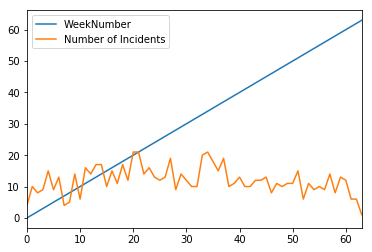

In [114]:
dfByWeek.plot(["Number of Incidents"])